## MAX CUT SDP relaxation
### Graph based on viewers rating movies
Here we solve the relaxed SDP to find the MAX cut in a graph. The goal is to find integral solution for $\gamma$-stable graphs

In [2]:
%matplotlib inline
import networkx as nx
import numpy as np
import pylab

from algo import build_laplacian, solve_sdp, assignment_solution_sdp
from data_proc import build_a, build_graph, build_user_to_movies

## Fake data to illustrate the integral solution
Easy max cut solution. 

In [3]:
W = np.array([[0,4,0,8],[4,0,0,2],[0,0,0,7],[8,2,7,0]])
L = build_laplacian(W)
X = solve_sdp(L, triangle_inequalities=True)

{'time': 0.08507513999938965, 'obj': 76.00000011979631, 'cvxopt_sol': {'gap': 1.0930143098130873e-06, 'relative gap': 1.4381767288595134e-08, 'primal slack': 2.403487699479747e-09, 'primal infeasibility': 2.422191921200266e-09, 'y': <4x1 matrix, tc='d'>, 'dual objective': -76.00000052607639, 'dual slack': 1.3267550581544602e-09, 'dual infeasibility': 2.2773570244771605e-10, 'status': 'optimal', 'primal objective': -75.99999971351623, 'iterations': 6, 'residual as primal infeasibility certificate': None, 'z': <272x1 matrix, tc='d'>, 'residual as dual infeasibility certificate': None, 's': <272x1 matrix, tc='d'>, 'x': <10x1 matrix, tc='d'>}, 'status': 'optimal'}
[ 1.00e+00 -1.00e+00  1.00e+00 -1.00e+00]
[-1.00e+00  1.00e+00 -1.00e+00  1.00e+00]
[ 1.00e+00 -1.00e+00  1.00e+00 -1.00e+00]
[-1.00e+00  1.00e+00 -1.00e+00  1.00e+00]



In [5]:
# assignment
X_array=np.array(X)
assignment_X = assignment_solution_sdp(X_array)

[ True False  True False]


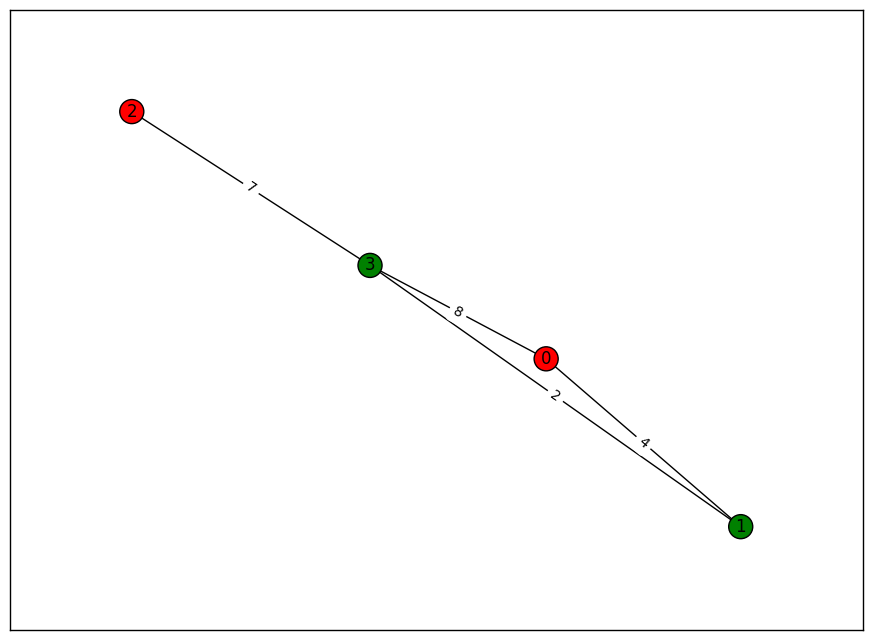

In [8]:
#display the graph
G = nx.from_numpy_matrix(W)
fig=pylab.figure(figsize=(11,8))

colors = ['g', 'r']

node_colors=['w']*W.shape[0]
for node, cluster in enumerate(assignment_X):
    node_colors[node] = colors[int(cluster)]

pos=nx.spring_layout(G)
#edges
nx.draw_networkx(G,pos,
                edgelist=[e for e in G.edges()],
                node_color=node_colors)


labels={e:'{0}'.format(W[e]) for e in G.edges()}
#flow label
nx.draw_networkx_edge_labels(G, pos,
                        edge_labels=labels)

#hide axis
fig.gca().axes.get_xaxis().set_ticks([])
fig.gca().axes.get_yaxis().set_ticks([])

pylab.show()

#### We introduce a gamma perturbation for all edges

In [ ]:
gamma = 2
W_gamma1 = gamma * W
L = build_laplacian(W_gamma1)
X = solve_sdp(L, triangle_inequalities=True)
print(X)
X_array=np.array(X)
assignment_X = assignment_solution_sdp(X_array)
print(assignment_X)

#### We introduce a gamma perturbation for only part of the edges

In [ ]:
gamma = 2 # if gamma = 1000 it may not work depending of the mask
# random boolean mask for which values will be changed
mask = np.random.randint(0,2,size=W.shape).astype(np.bool)

# random matrix the same shape of the data
W = np.array([[0,4,0,8],[4,0,0,2],[0,0,0,7],[8,2,7,0]])
r = gamma * W

# use your mask to replace values in your input array
W_gamma2 = W
W_gamma2[mask] = r[mask]
L = build_laplacian(W)
X = solve_sdp(L, triangle_inequalities=True)
print(X)
X_array=np.array(X)
assignment_X = assignment_solution_sdp(X_array)
print(assignment_X)

## Simulated data
Simulating a bipartite graph with viewers giving grades (between -2.5 and 2.5) to movies.

In [12]:
W = np.array([[0,0,0,-2,0,-0.5],[0,0,0,2,2.5,0],[0,0,0,0,-1,2.5],[-2,2,0,0,0,0],[0,2.5,-1,0,0,0],[-0.5,0,2.5,0,0,0]])
L = build_laplacian(W)
X = solve_sdp(L, triangle_inequalities=True)
X_array=np.array(X)
assignment_X = assignment_solution_sdp(X_array)

{'time': 0.020270824432373047, 'obj': 25.999999941508296, 'cvxopt_sol': {'gap': 7.780167062466626e-07, 'relative gap': 2.992371991446997e-08, 'primal slack': 7.100027083777672e-10, 'primal infeasibility': 7.124641293608196e-10, 'y': <6x1 matrix, tc='d'>, 'dual objective': -26.000000268314828, 'dual slack': 4.247688083891463e-11, 'dual infeasibility': 2.0973679594515901e-10, 'status': 'optimal', 'primal objective': -25.999999614701764, 'iterations': 7, 'residual as primal infeasibility certificate': None, 'z': <900x1 matrix, tc='d'>, 'residual as dual infeasibility certificate': None, 's': <900x1 matrix, tc='d'>, 'x': <21x1 matrix, tc='d'>}, 'status': 'optimal'}


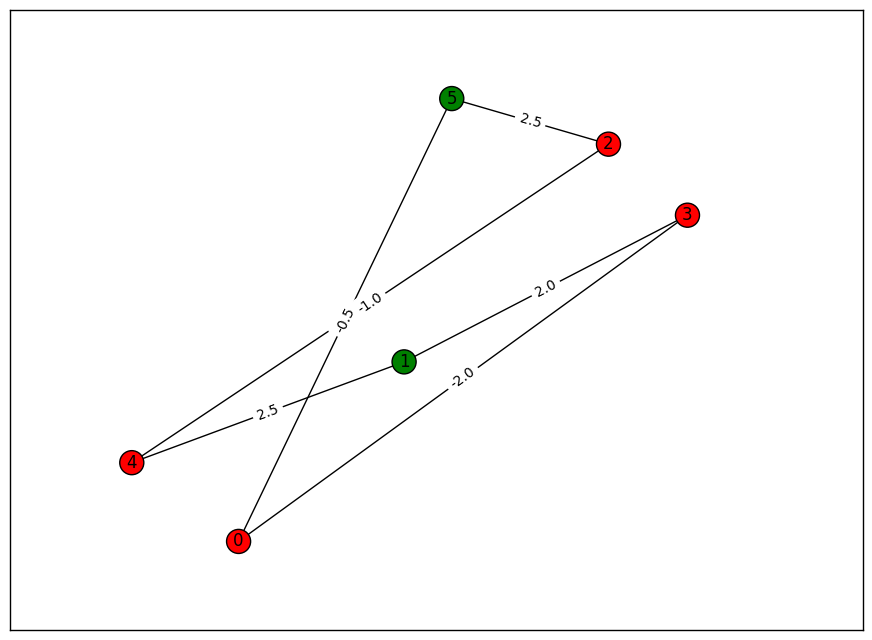

In [13]:
#display the graph
G = nx.from_numpy_matrix(W)
fig=pylab.figure(figsize=(11,8))

colors = ['g', 'r']

node_colors=['w']*W.shape[0]
for node, cluster in enumerate(assignment_X):
    node_colors[node] = colors[int(cluster)]

pos=nx.spring_layout(G)
#edges
nx.draw_networkx(G,pos,
                edgelist=[e for e in G.edges()],
                node_color=node_colors)


labels={e:'{0}'.format(W[e]) for e in G.edges()}
#flow label
nx.draw_networkx_edge_labels(G, pos,
                        edge_labels=labels)

#hide axis
fig.gca().axes.get_xaxis().set_ticks([])
fig.gca().axes.get_yaxis().set_ticks([])

pylab.show()

#### We introduce a gamma perturbation for all edges

In [ ]:
gamma = 2
W_gamma1 = gamma * W
L = build_laplacian(W_gamma1)
X = solve_sdp(L, triangle_inequalities=True)
print(X)
X_array=np.array(X)
assignement_X = assignment_solution(X_array)
print(assignement_X)

#### We introduce a gamma perturbation for only one edge

In [ ]:
gamma = 10 # if gamma = 1000 it may not work anymore
# random boolean mask for which values will be changed
W_gamma2 = np.array([[0,0,0,-2,0,-0.5*gamma],[0,0,0,2,2.5,0],[0,0,0,0,-1,2.5],[-2,2,0,0,0,0],[0,2.5,-1,0,0,0],[-0.5*gamma,0,2.5,0,0,0]])

In [ ]:
L = build_laplacian(W_gamma2)
X = solve_sdp(L, triangle_inequalities=True)
print(X)
X_array=np.array(X)
assignement_X = assignment_solution(X_array)
print(assignement_X)

## Real data from themoviedb.org
Extracting  a sub graph of the entire database

In [15]:
# building the summary dictionary
summary_dictionary = build_user_to_movies('movielens.tsv')
# unpacking of the dictionary
users_to_movies = summary_dictionary['users_to_movies']
n_users = summary_dictionary['n_users']
k_users = 4
n_movies = summary_dictionary['n_movies']
k_movies = 4
# building the rating matrix
a = build_a(n_users, k_users, n_movies, k_movies, users_to_movies)
# building the adjacency matrix
W = build_graph(k_users, k_movies, a)
print(W)

[[ 0.   0.   0.   0.   0.   0.   0.5  0. ]
 [ 0.   0.   0.   0.   1.   1.   1.5  1. ]
 [ 0.   0.   0.   0.   2.5  0.   0.   1.5]
 [ 0.   0.   0.   0.   0.   1.   0.   0. ]
 [ 0.   1.   2.5  0.   0.   0.   0.   0. ]
 [ 0.   1.   0.   1.   0.   0.   0.   0. ]
 [ 0.5  1.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   1.   1.5  0.   0.   0.   0.   0. ]]


In [16]:
# the laplacian of the graph
L = build_laplacian(W)
X = solve_sdp(L, triangle_inequalities=True)
X_array=np.array(X)
assignment_X = assignment_solution_sdp(X_array)

{'time': 0.07647228240966797, 'obj': 40.000000000455785, 'cvxopt_sol': {'gap': 8.477697897169121e-08, 'relative gap': 2.1194244762395594e-09, 'primal slack': 3.458816613162795e-11, 'primal infeasibility': 3.465602879233312e-11, 'y': <8x1 matrix, tc='d'>, 'dual objective': -40.00000003766266, 'dual slack': 8.852246082952298e-12, 'dual infeasibility': 1.0609322689400165e-11, 'status': 'optimal', 'primal objective': -39.99999996324891, 'iterations': 8, 'residual as primal infeasibility certificate': None, 'z': <2112x1 matrix, tc='d'>, 'residual as dual infeasibility certificate': None, 's': <2112x1 matrix, tc='d'>, 'x': <36x1 matrix, tc='d'>}, 'status': 'optimal'}


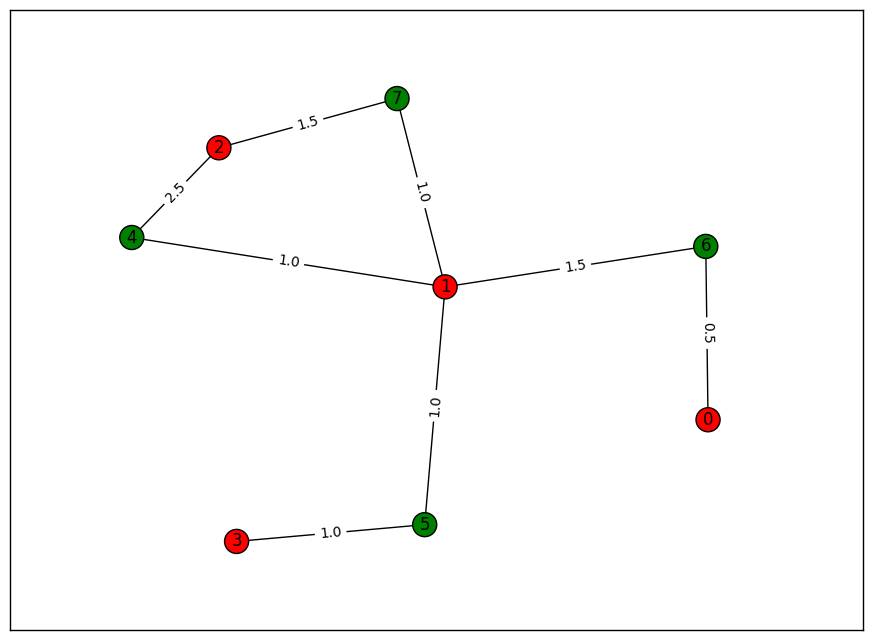

In [17]:
#display the graph
G = nx.from_numpy_matrix(W)
fig=pylab.figure(figsize=(11,8))

colors = ['g', 'r']

node_colors=['w']*W.shape[0]
for node, cluster in enumerate(assignment_X):
    node_colors[node] = colors[int(cluster)]

pos=nx.spring_layout(G)
#edges
nx.draw_networkx(G,pos,
                edgelist=[e for e in G.edges()],
                node_color=node_colors)


labels={e:'{0}'.format(W[e]) for e in G.edges()}
#flow label
nx.draw_networkx_edge_labels(G, pos,
                        edge_labels=labels)

#hide axis
fig.gca().axes.get_xaxis().set_ticks([])
fig.gca().axes.get_yaxis().set_ticks([])

pylab.show()

#### We introduce a gamma perturbation for only part of the edges

In [ ]:
gamma = 2 
# random boolean mask for which values will be changed
mask = np.random.randint(0,2,size=W.shape).astype(np.bool)

# random matrix the same shape of the data
r = gamma * W

# use your mask to replace values in your input array
W_gamma2 = W.copy()
W_gamma2[mask] = r[mask]
L = build_laplacian(W_gamma2)
X = solve_sdp(L, triangle_inequalities=True)
print(X)
X_array=np.array(X)
assignement_X = assignment_solution(X_array)
print(assignement_X)